In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
from numpy.typing import ArrayLike

### ZADANIE 3 - METODA REDUKCJI WARIANCJI

#### $\textbf{Metoda Monte Carlo}$ wykorzystywana jest do przybliżania wyników za pomocą losowego próbkowania i estymacji średniej z tych próbek.
$$ \large \hat{X} = \dfrac{1}{N} \sum_{i=1}^N X_i$$
#### gdzie: $X_i$ - niezależne zmienne losowe o ustalonym rozkładzie.

#### Jednak jednym z głównych problemów Monte Carlo jest wysoki błąd: $\frac{\sigma}{\sqrt{N}}$. Aby zwiększyć dokładność estymacji, stosuje się metody redukcji wariancji, które zmniejszają ten błąd.

#### $\textbf{Metoda odbić lustrzanych}$ (ang. antithetic variates) jest jedną z efektywnych technik redukcji wariancji. Polega ona na generowaniu par sprzężonych próbek losowych (ujemnie skorelowanych o tych samych rozkładach) $\left(X_i, X_i'\right)$, gdzie: $X_i'$ odbicie lustrzane $X_i$ względem pewnej osi. Wtedy:
$$ \large \hat{X} = \dfrac{1}{2N} \sum_{i=1}^N \left(X_i+ X_i'\right)$$

#### Dzięki tej technice, próbki są dobrze zbalansowane wokół środka i skrajnych wartości, co prowadzi do zredukowania wariancji i lepszej dokładności estymacji w porównaniu do klasycznej metody Monte Carlo.

#### Poniżej przedstawiono rozwiązanie następującej całki z wykorzystaniem wspomnianych metod
$$
\large \int_0^1 \dfrac{4}{1+x^2} \, dx \quad \left(=\pi\right)
$$

In [347]:
def function(x: float) -> float:
    """Oblicz wartość funkcji w zadanym punkcie.

    Parameters
    ----------
    X: float
        wartość argumentu funkcji

    Returns:
    ----------
    float
        wartość funkcji w zadanym punkcie
    """
    return 4 / (1 + x**2)

In [348]:
def monte_carlo(
    a: int = 0,
    b: int = 1,
    func: typing.Callable[[float], float] = function,
    n: int = 1000,
) -> float:
    """Oszacuj wartość całki przy użyciu metody Monte Carlo.

    Parameters
    ----------
    a: int
        dolna granica przedziału całkowania (default 0)
    b: int
        górna granica przedziału całkowania (default 1)
    func: function
        funkcja podcałkowa
    n: int
        liczba generowanych próbek/symulacji (default 1000)

    Returns:
    ----------
    float
        szacunkowa wartość całki na przedziale [a,b]
    """
    U = np.random.uniform(a, b, n)
    result = np.mean(func(U))
    return result

In [349]:
result_monte = monte_carlo(n=1000)
print(result_monte)

3.132258051110906


In [350]:
def antithetic(
    a: int = 0,
    b: int = 1,
    func: typing.Callable[[float], float] = function,
    n: int = 1000,
) -> float:
    """Oszacuj wartość całki przy użyciu metody odbić lustrzanych.

    Parameters
    ----------
    a: int
        dolna granica przedziału całkowania (default 0)
    b: int
        górna granica przedziału całkowania (default 1)
    func: function
        funkcja podcałkowa
    n: int
        liczba generowanych próbek/symulacji (default 1000)

    Returns:
    ----------
    float
        wartość całki na przedziale [a,b]
    """
    U = np.random.uniform(a, b, n)
    U_prim = b - U
    result = np.mean(func(U) + func(U_prim)) / 2
    return result

In [351]:
result_anti = antithetic(n=1000)
print(result_anti)

3.138645558662015


In [353]:
def error(M: ArrayLike, func: typing.Callable[[int], float]) -> ArrayLike:
    """Oblicz błąd szacowania.

    Parameters
    ----------
    M: ArrayLike
        tablica z liczbą symulacji
    func: function
        funkcja, która szacuje wartość zadanej całki (wartość liczby pi)

    Returns
    ----------
    ArrayLike
        błędy szacowania dla różnej liczby symulacji
    """
    N = len(M)
    errors = np.zeros(N)
    idx = 0
    for i in M:
        errors[idx] = np.abs(np.pi - func(i))
        idx += 1
    return errors

In [354]:
M0 = np.arange(10**3, 10**5, 10**3)
error_monte = error(M=M0, func=lambda n_i: monte_carlo(n=n_i))
error_antithetic = error(M=M0, func=lambda n_i: antithetic(n=n_i))

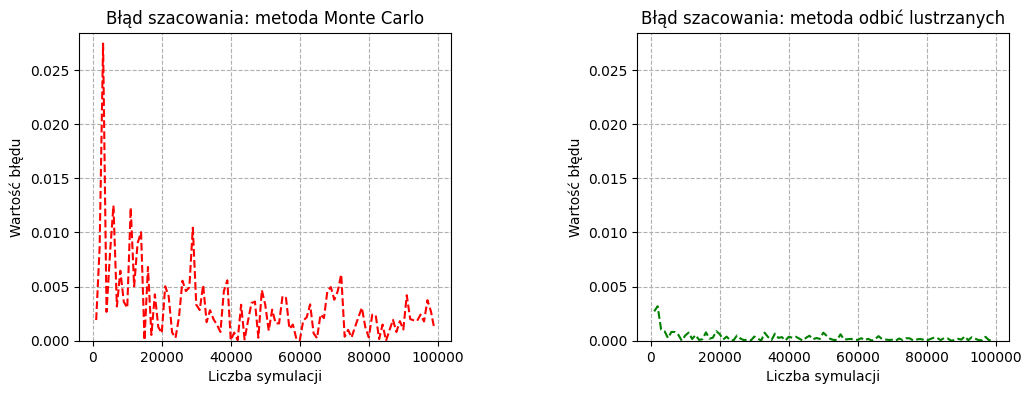

In [355]:
plt.figure(figsize=(12, 4))

# Monte Carlo
plt.subplot(1, 2, 1)
plt.plot(M0, error_monte, "r--")
plt.title("Błąd szacowania: metoda Monte Carlo")
plt.xlabel("Liczba symulacji")
plt.ylabel("Wartość błędu")
plt.ylim(0, max(np.max(error_monte), np.max(error_antithetic)) + 10 ** (-3))
plt.grid(linestyle="--")

# Metoda odbić lustrzanych
plt.subplot(1, 2, 2)
plt.plot(M0, error_antithetic, "g--")
plt.title("Błąd szacowania: metoda odbić lustrzanych")
plt.xlabel("Liczba symulacji")
plt.ylabel("Wartość błędu")
plt.ylim(0, max(np.max(error_monte), np.max(error_antithetic)) + 10 ** (-3))
plt.grid(linestyle="--")

plt.subplots_adjust(wspace=0.5)
plt.show()